<a href="https://colab.research.google.com/github/qwertyqwertyqwertyqwerty123/colab_projects/blob/main/clust_bad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Число объектов в каждом кластере:
Cluster
0    33098
1    20472
2     2122
Name: count, dtype: int64


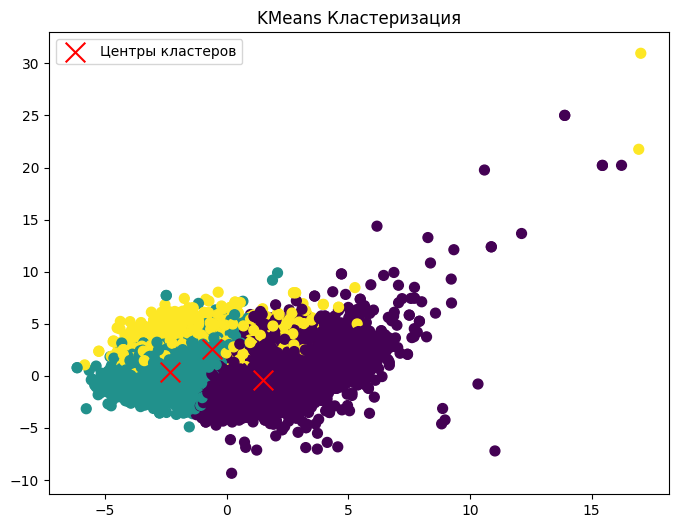

In [ ]:
# Подключение к Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Загрузка данных
df = pd.read_csv('/content/drive/MyDrive/smoking.csv')  # Укажи корректный путь, если другой

# Удаление колонки ID, если она есть
if 'ID' in df.columns:
    df = df.drop(columns=['ID'])

# Кодирование категориальных признаков
categorical_cols = df.select_dtypes(include='object').columns
df[categorical_cols] = df[categorical_cols].apply(LabelEncoder().fit_transform)

# Масштабирование признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# PCA для визуализации
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Кластеризация KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Добавление меток кластеров в DataFrame
df['Cluster'] = labels

# Таблица с количеством объектов в каждом кластере
cluster_counts = df['Cluster'].value_counts().sort_index()
print("Число объектов в каждом кластере:")
print(cluster_counts)

# Визуализация кластеров и центров
centers_pca = pca.transform(kmeans.cluster_centers_)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', marker='x', s=200, label='Центры кластеров')
plt.title('KMeans Кластеризация')
plt.legend()
plt.show()
